In [2]:
data <- read.csv(file = 'data3.csv', header = TRUE, sep = '\t', dec = ',')

In [3]:
data$m <- seq(1, length(data$Cars))
data
main_ <- 'Количество проданных авто'
xlab_ <- 'Месяц'
ylab_ <- 'Количество авто, ед.'
sub_ <- 'Начиная с 1960-01'

Month,Cars,m
1960-01,6550,1
1960-02,8728,2
1960-03,12026,3
1960-04,14395,4
1960-05,14587,5
1960-06,13791,6
1960-07,9498,7
1960-08,8251,8
1960-09,7049,9
1960-10,9545,10


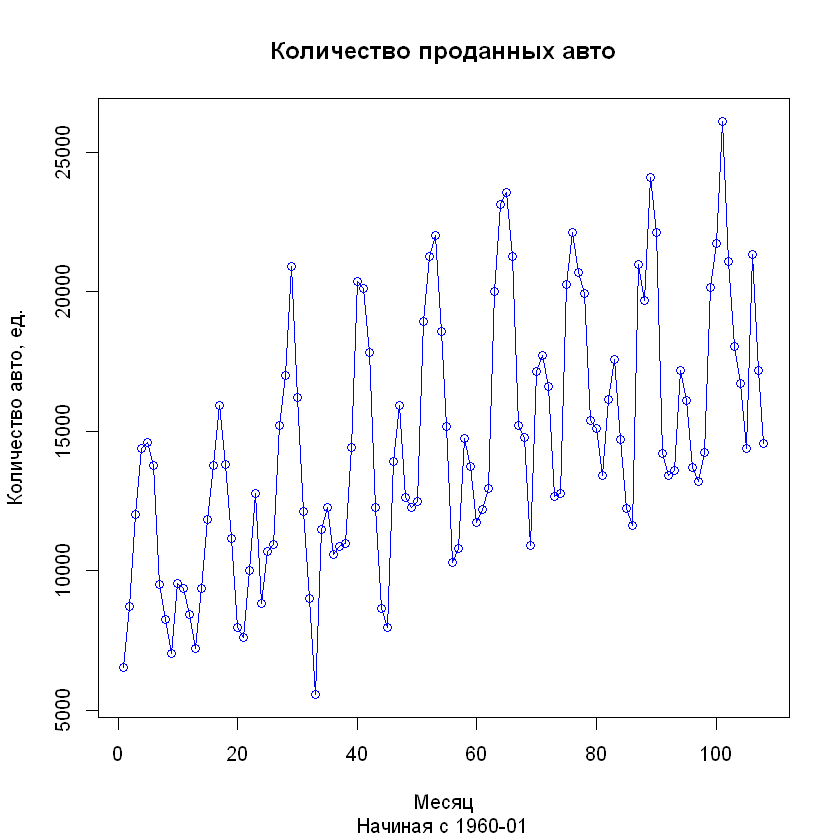

In [4]:
plot(data$m, data$Cars, main = main_,
    xlab = xlab_, ylab = ylab_, type = 'o',
    col = 'blue', sub = sub_)

Можно предположить, что модель тренда аддитивная

# Аддитивная модель

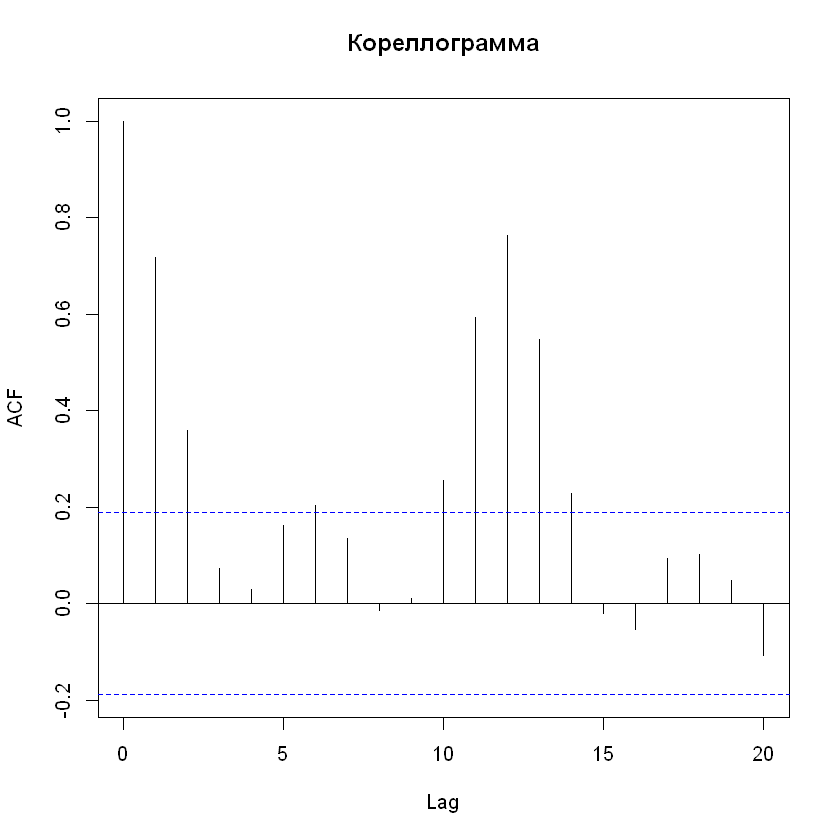

In [5]:
# Строим коррелограмму
acf(data$Cars, type = 'correlation', plot = TRUE, main = 'Кореллограмма')

По коррелограмме определяем наличие тренда и сезонных колебаний с периодом, равным 6 месяцам

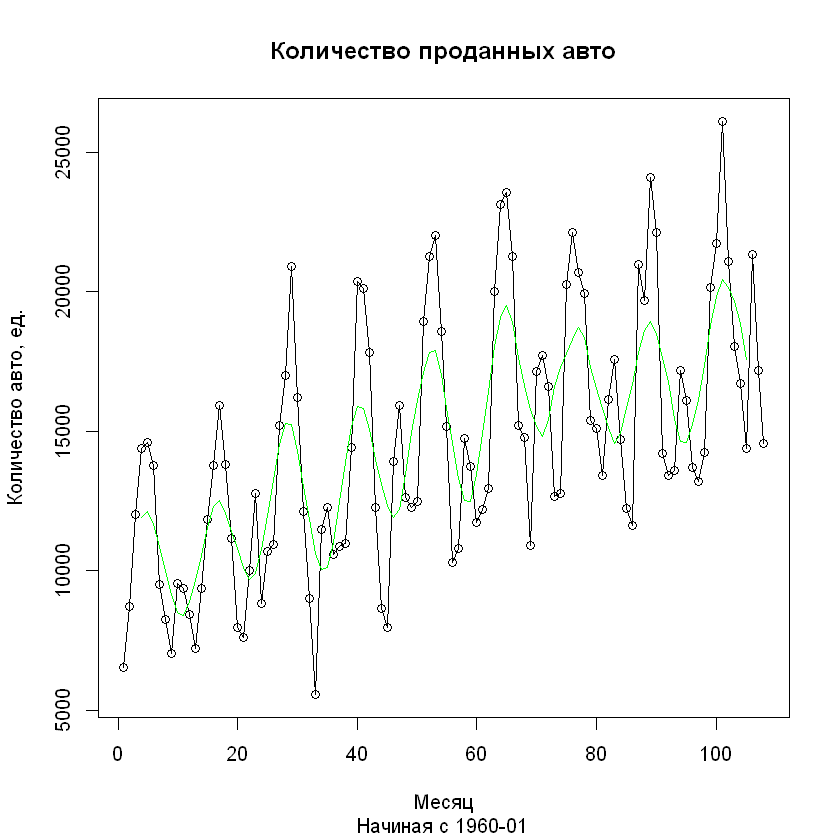

In [6]:
library(forecast)
sn <- ma(data$Cars, order=6, centre = TRUE)
plot(data$Cars, main = main_, ylab = ylab_,
    xlab = xlab_, type = 'o', sub = sub_)
lines(sn, col = 'green')

In [7]:
A <- matrix(data = data$Cars - sn, nrow = 6)
Sm <- apply(A, 1, function(x){mean(x, na.rm = TRUE)})
M.S <- rep(Sm, times = 6)

In [8]:
Tr <- data$Cars - M.S
T <- seq(1, length(Tr))
regM <- lm(Tr ~ T)
M.Trend <- coef(regM)[1] + coef(regM)[2] * T

[1] 18.97616

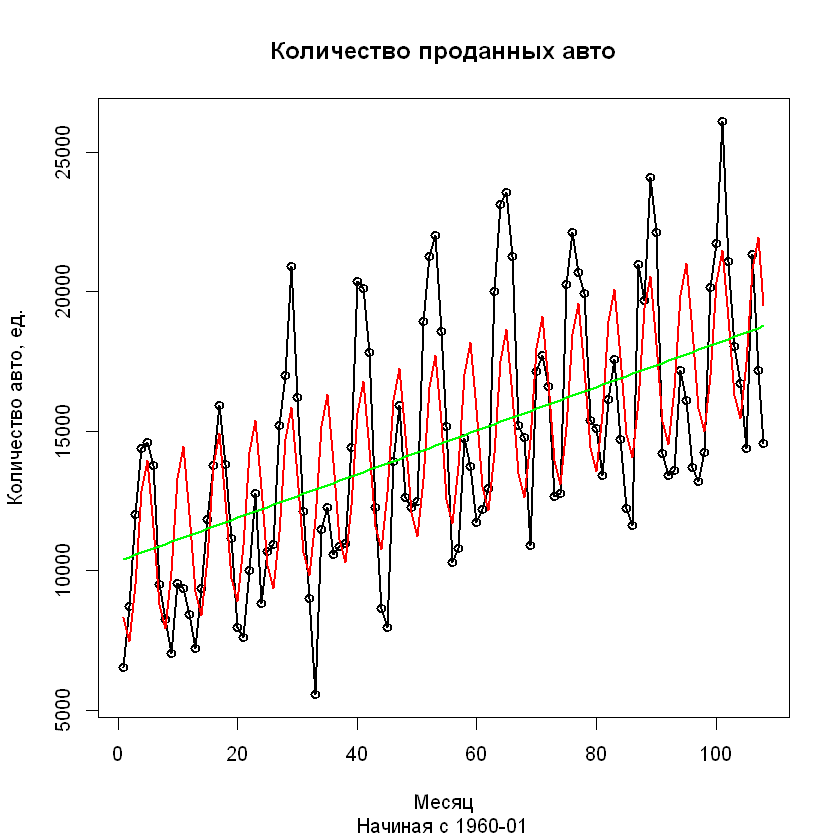

In [9]:
M.fit <- M.Trend + M.S
plot(data$Cars, main = main_, ylab = ylab_,
    xlab = xlab_, type = 'o', sub = sub_, lwd = 2)
lines(M.fit, col = 'red', lwd = 2)
lines(M.Trend, col = 'green', lwd = 2)
sum(abs((data$Cars - M.fit)/data$Cars))/length(data$Cars)*100

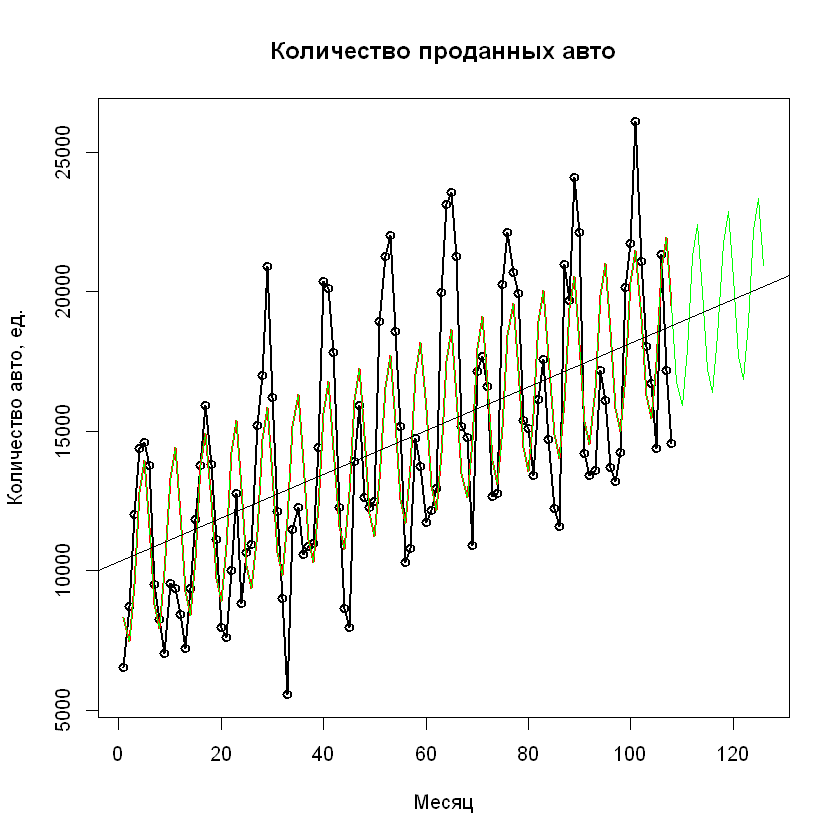

In [10]:
M.F <- array(dim = 6) # создать массив для хранения прогноза
T1 <- seq(from=1, to=max(data$m) + 6 * 3) # создать массив для времени прогноза
M.F <- (coef(regM)[1]+coef(regM)[2]*T1) + Sm # рассчитать прогнозные значения
plot(data$Cars, main= main_, ylab= ylab_,
     xlab= xlab_, type="o", xlim = c(1, max(data$m) + 6 * 3),
     ylim = c(min(data$Cars), max(data$Cars) + 5), lwd = 2) # график временного ряда
lines(M.fit, col="red", lwd = 2) # график модели временного ряда
lines(x=T1 , y=M.F, col="green") # график прогноза
abline(regM)

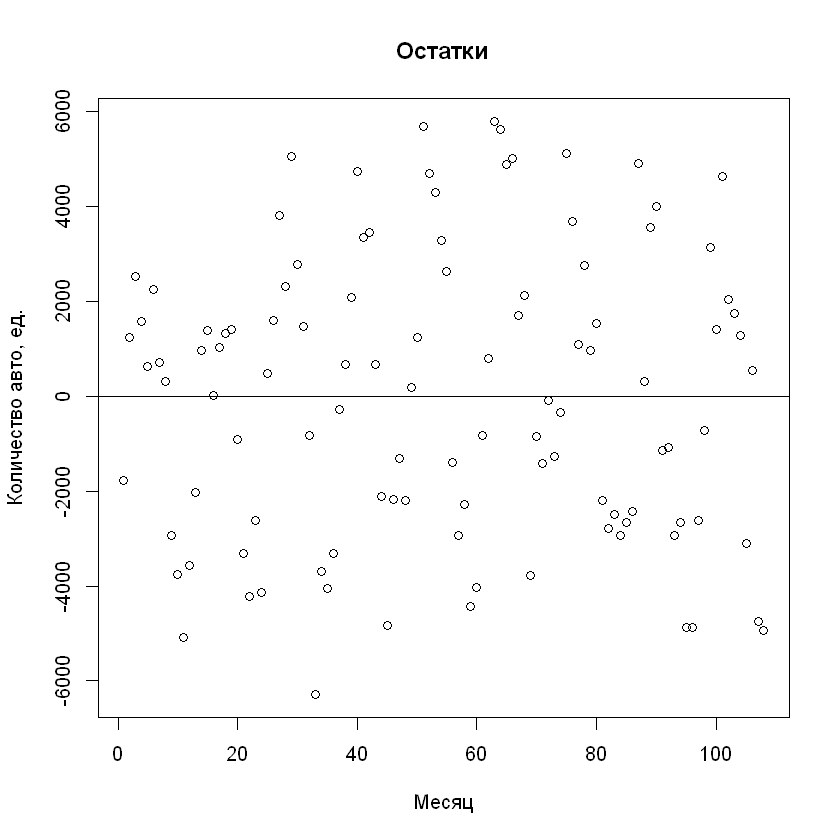


	Box-Pierce test

data:  M.Res
X-squared = 46.948, df = 1, p-value = 7.288e-12


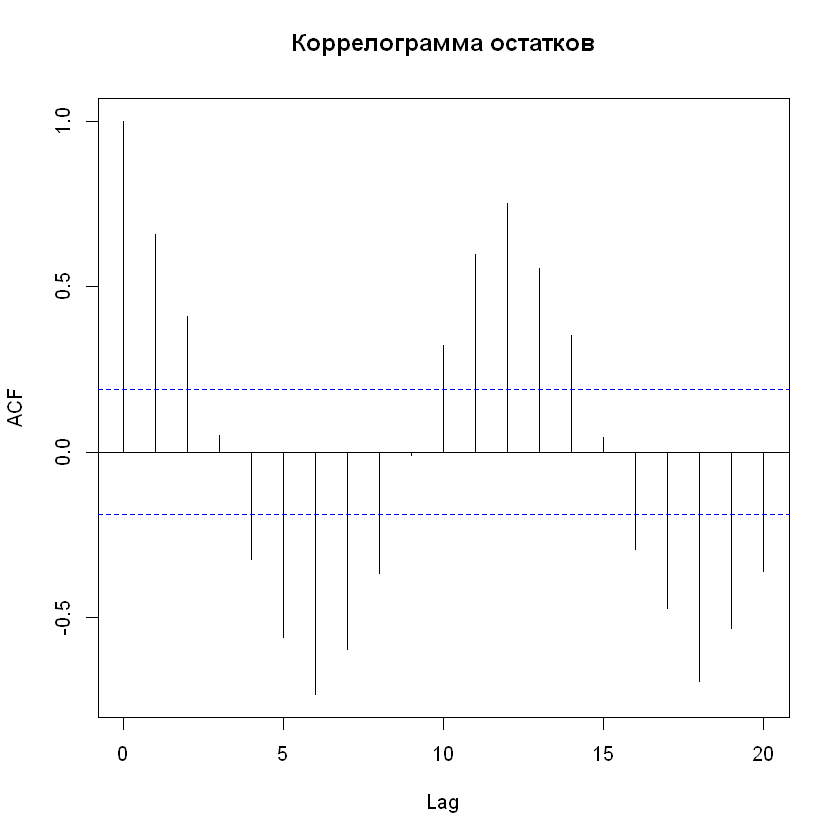

In [11]:
M.Res <- data$Cars - M.fit # рассчитать остатки
plot(M.Res, type="p", main="Остатки", ylab= ylab_,
        xlab = xlab_) # график остатков
abline(0, 0, col = 'black')
acf(M.Res, main="Коррелограмма остатков") # коррелограмма остатков
Box.test(M.Res) # проверить остатки на белый шум

# Мультипликативная модель

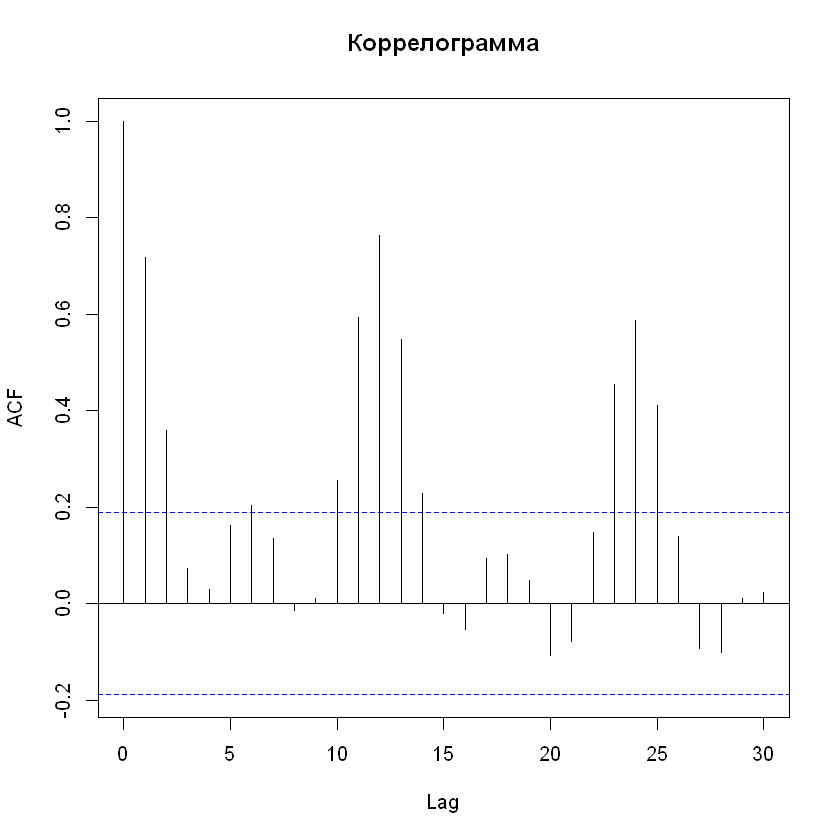

In [11]:
acf(data$Cars, type="correlation",
    plot=TRUE, main="Коррелограмма", lag.max = 30)

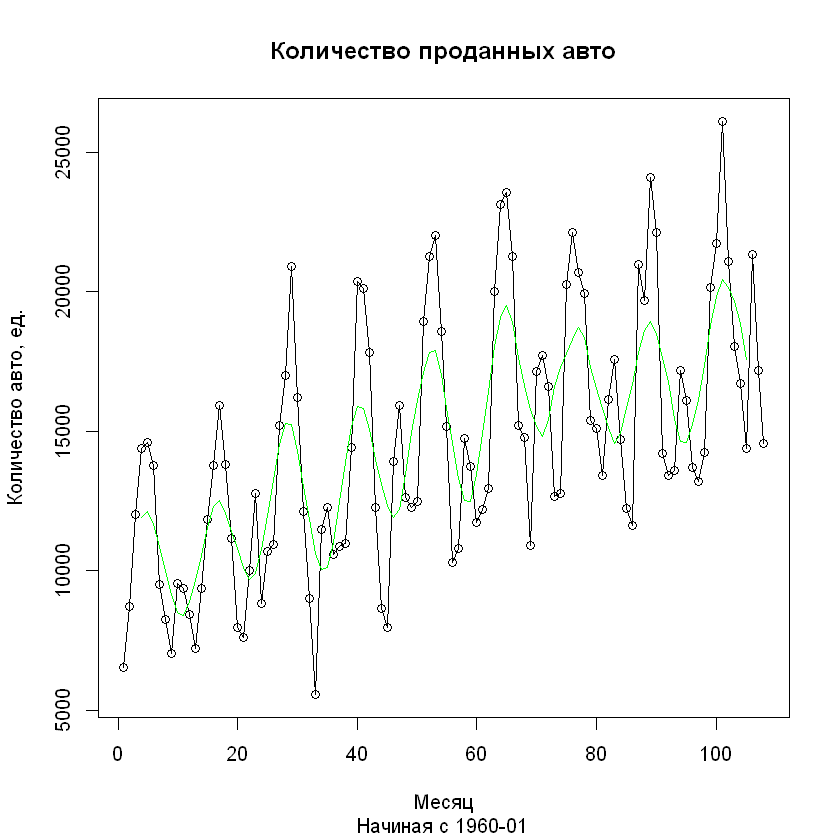

In [12]:
sp <- ma(data$Cars,
         order=6, centre = TRUE) # сгладить временной ряд методом скользящего среднего
plot(data$Cars, main = main_, sub = sub_,
     ylab = ylab_, xlab = xlab_, type="o")
lines(sp, col="green") # нарисовать сглаженный ряд

In [35]:
Ap <- matrix(data=data$Cars/sp, nrow = 6 * 3) 
# разделить значения временного ряда на сглаженное значение
SP <- apply(Ap, 1, function(x){mean(x, na.rm = TRUE)})
Mp.S <- rep(SP,times=6) # записать сезонную составляющую временного ряда

In [36]:
Trp <- data$Cars/Mp.S # удалить сезонную составляющую из временного ряда
T <- seq(from = 1, to = max(data$m)) # сформировать значения t
regMp <- lm(Trp ~ T) # построить линейную регрессию
Mp.Trend <- coef(regMp)[1] + coef(regMp)[2] * T # записать тренд для временного ряда

[1] 18.75273

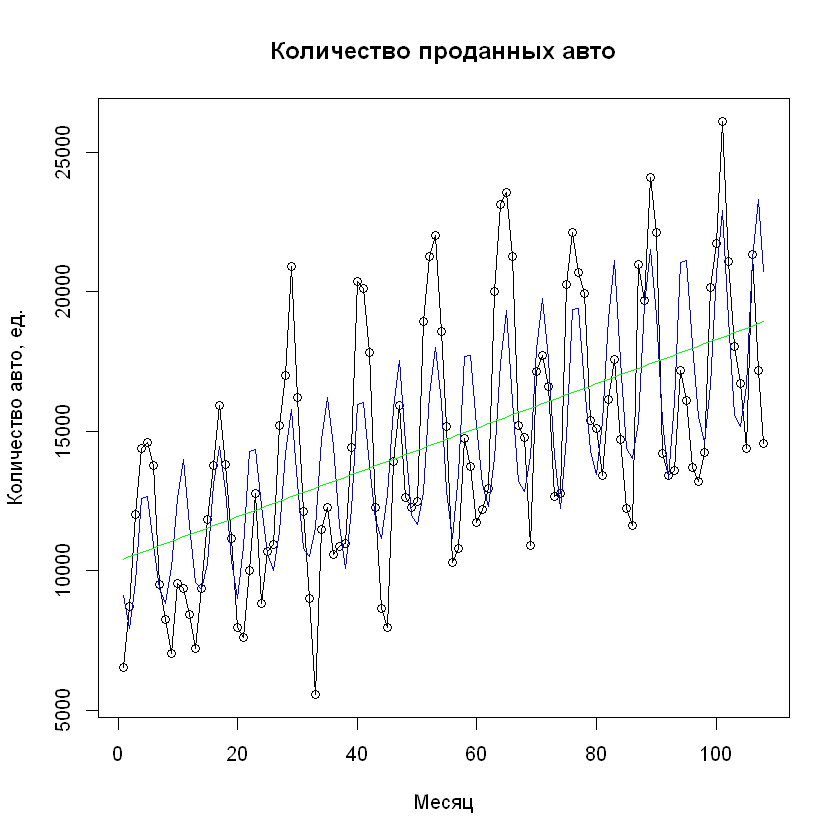

In [37]:
Mp.fit<-Mp.Trend*Mp.S # рассчитать значения временного ряда по модели
plot(data$Cars, main = main_,
     ylab = ylab_, xlab= xlab_, type="o")
lines(Mp.fit, col="blue") # график модели временного ряда
lines(Mp.Trend, col="green") # график тренда временного ряда
sum(abs((data$Cars - Mp.fit)/data$Cars))/length(data$Cars)*100 # рассчитать MAPE

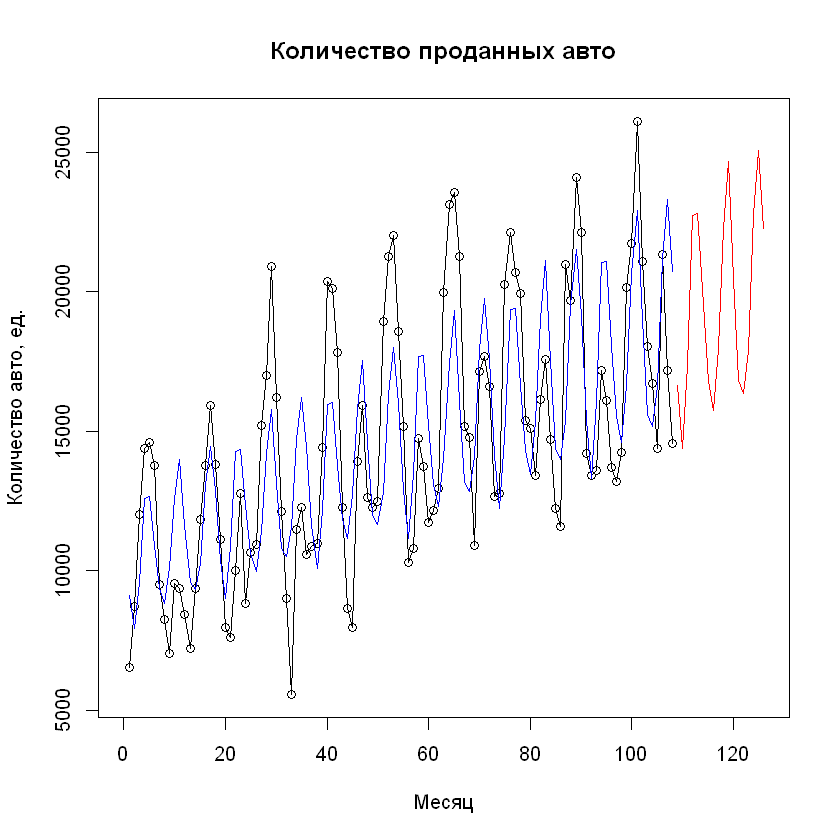

In [38]:
Mp.F <- array(dim = 6) # создать массив для хранения прогноза
T1 <- seq(from=max(data$m) + 1, to=max(data$m)+3*6) # создать массив для времени прогноза
Mp.F <- (coef(regMp)[1] + coef(regMp)[2]*T1)*SP # рассчитать прогнозные значения
plot(data$Cars, main = main_, ylab= ylab_,
     xlab=xlab_, type="o", xlim = c(0, max(data$m)+3*6),
     ylim = c(min(data$Cars), max(data$Cars) + 5)) 
# график временного ряда
lines(Mp.fit, col="blue") # график модели временного ряда
lines(x=T1 , y=Mp.F, col="red") # график прогноза

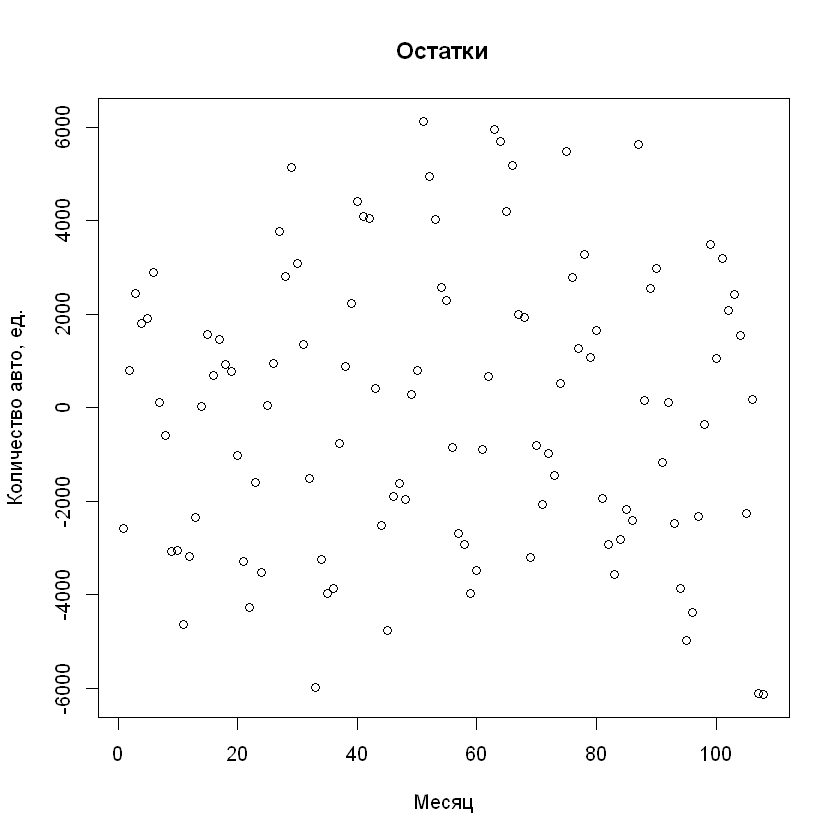


	Box-Pierce test

data:  Mp.Res
X-squared = 47.554, df = 1, p-value = 5.352e-12


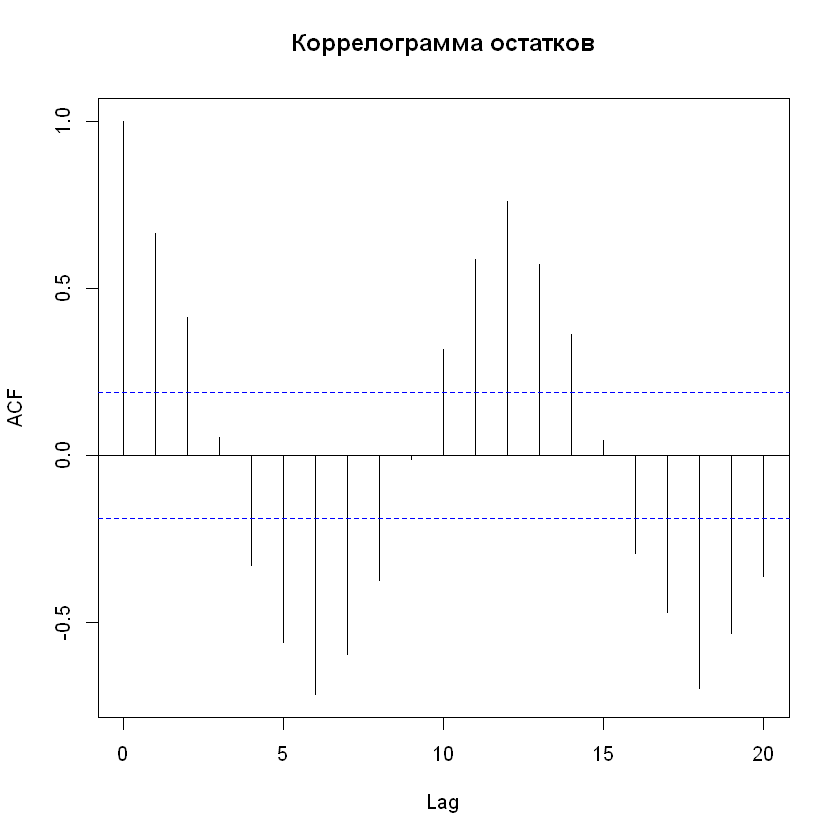

In [39]:
Mp.Res <- data$Cars - Mp.fit # рассчитать остатки
plot(Mp.Res, type="p", main="Остатки", ylab=ylab_,  xlab=xlab_) 
# график остатков
acf(Mp.Res, main="Коррелограмма остатков") # коррелограмма остатков
Box.test(Mp.Res) # проверить остатки на белый шум